In [5]:
import scipy as sp
import numpy as np
train_adj_graph = sp.sparse.load_npz('./train_coo_adj_graph.npz')
coo_record = sp.sparse.load_npz('./coo_record.npz')
train_coo_record = sp.sparse.load_npz('./train_coo_record.npz')
val_coo_record = sp.sparse.load_npz('./val_coo_record.npz')
test_coo_record = sp.sparse.load_npz('./test_coo_record.npz')



(219343, 219343)


In [7]:
print('train_adj_graph:', train_adj_graph.nnz)
print('coo_record:', coo_record.shape)
print('train_coo_record:', train_coo_record.shape)
print('val_coo_record:', val_coo_record.shape)
print('test_coo_record:', test_coo_record.shape)

train_adj_graph: 5143504
coo_record: (82633, 136710)
train_coo_record: (82633, 136710)
val_coo_record: (82633, 136710)
test_coo_record: (82633, 136710)


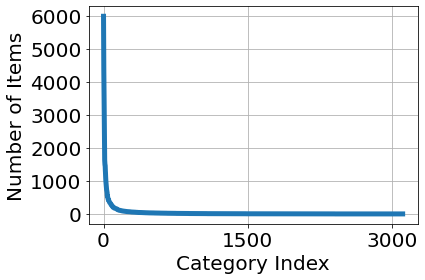

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fontsize = 20

category_dic = {}
with open('./item_category.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(',')
        item = int(line[0])
        category = int(line[1])
        if category in category_dic:
            category_dic[category] += 1
        else:
            category_dic[category] = 1
# plt.figure(figsize=(4,3))
plt.plot([i for i in range(len(category_dic))], list(sorted(category_dic.values(), reverse = True)), linewidth = 5)
plt.xticks([0, 1500, 3000], fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('Category Index', fontsize = fontsize)
plt.ylabel('Number of Items', fontsize = fontsize)
plt.grid()
plt.tight_layout()
plt.savefig('category_item_number.pdf')
plt.show()

# data = pd.DataFrame(list(sorted(category_dic.values(), reverse = True)))
# print(data.describe())

# print(sorted(category_dic.values(), reverse = True))

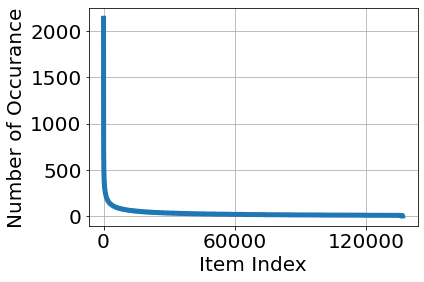

In [5]:
dic = {}

def read_data(path, dic):
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            [user, item] = line.strip().split(',')
            if item in dic:
                dic[item] += 1
            else:
                dic[item] = 1
read_data('train.txt', dic)
read_data('val.txt', dic)
read_data('test.txt', dic)

# plt.figure(figsize=(4,3))
plt.plot([i for i in range(len(dic))], list(sorted(dic.values(), reverse = True)), linewidth = 5)
plt.xticks([0, 60000, 120000], fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('Item Index', fontsize = fontsize)
plt.ylabel('Number of Occurance', fontsize = fontsize)
plt.grid()
plt.tight_layout()
plt.savefig('item_occurance.pdf')
plt.show()